In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

np.random.seed(7)
top_words=5000
(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=top_words)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])
max_review_length=500
X_train=sequence.pad_sequences(X_train,maxlen=max_review_length)
X_test=sequence.pad_sequences(X_test,maxlen=max_review_length)
print(X_train.shape)
print(X_test.shape)
print(X_train[0])

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must sp

(25000,)
(25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]
(25000, 500)
(25000, 500)
[   0    0    0    0    0    0 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
model=Sequential()
words={'I':0, 'am':1, 'a':2, 'boy':3}
model.add(Embedding(5,1,input_length=1))
embeddings=model.layers[0].get_weights()[0]
words_embeddings={w:embeddings[idx] for w, idx in words.items()}
print(words_embeddings)
print(words_embeddings['boy'])

{'I': array([0.03480787], dtype=float32), 'am': array([-0.01776464], dtype=float32), 'a': array([-0.00311971], dtype=float32), 'boy': array([0.02438749], dtype=float32)}
[0.02438749]


In [5]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

embedding_vecor_length = 32 
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=2)
hist=model.fit(X_train, y_train, epochs=10,validation_split=0.3, 
callbacks=[early_stopping])

Epoch 1/10
547/547 [==============================] - 113s 204ms/step - loss: 0.5766 - accuracy: 0.6714 - val_loss: 0.3916 - val_accuracy: 0.8389
Epoch 2/10
547/547 [==============================] - 121s 221ms/step - loss: 0.3955 - accuracy: 0.8166 - val_loss: 0.3570 - val_accuracy: 0.8464
Epoch 3/10
547/547 [==============================] - 105s 192ms/step - loss: 0.2545 - accuracy: 0.9002 - val_loss: 0.3264 - val_accuracy: 0.8628
Epoch 4/10
547/547 [==============================] - 102s 186ms/step - loss: 0.2415 - accuracy: 0.9085 - val_loss: 0.3329 - val_accuracy: 0.8631
Epoch 5/10
547/547 [==============================] - 103s 189ms/step - loss: 0.2343 - accuracy: 0.9096 - val_loss: 0.3464 - val_accuracy: 0.8572


In [7]:
scores = model.evaluate(X_train[:1000], y_train[:1000],verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))
scores = model.evaluate(X_test[:1000], y_test[:1000],verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

32/32 [==============================] - 1s 42ms/step - loss: 0.1612 - accuracy: 0.9580
Accuracy: 95.80%
32/32 [==============================] - 1s 40ms/step - loss: 0.3621 - accuracy: 0.8510
Accuracy: 85.10%


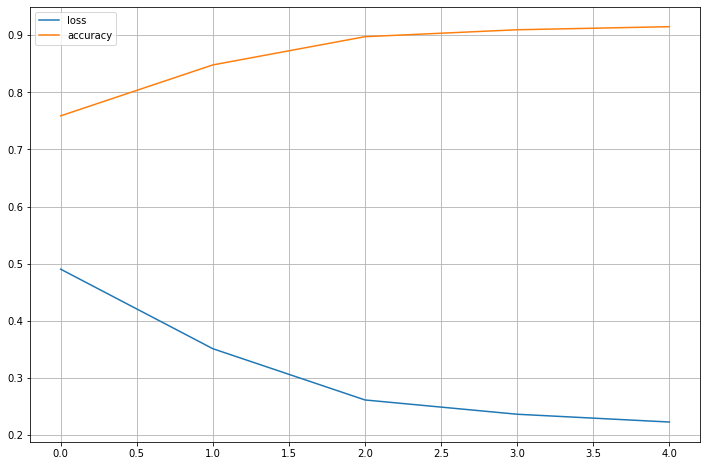

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['accuracy']) 
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()